In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)

In [4]:
df = pd.read_csv(r'datasets/songs_normalize.csv')
df.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000014,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic


1. How many Genre?
2. Year wise average popularity
3. Average popularity of artist
5. year wise Genre count
6. average popularity of each genre
7. year wise Artist count
8. average popularity of each Artist
4. Bivariate numerical relationship (if any, with popularity) cols vs popularity

In [5]:
df['genre'].unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
       'Folk/Acoustic, pop', 'rock, easy listening',
       'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
       'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'countr

In [6]:
df['genre'] = df['genre'].apply(lambda i: i.replace(' ',''))

In [7]:
gen =df['genre'].str.split(",", expand = True)
gen.columns = ['G1','G2','G3', 'G4']                 #Giving names to the columns
gen.head()

,G1,G2,G3,G4
0,pop,None,None,None
1,rock,pop,None,None
2,pop,country,None,None
3,rock,metal,None,None
4,pop,None,None,None


In [8]:
gen.shape

(2000, 4)

In [9]:
g1 = gen['G1'].append(gen['G2'])
g2 = g1.append(gen['G3'])
g3 = g2.append(gen['G4'])
g = pd.DataFrame(g3, columns = ['G'])
g = g.reset_index(drop = True)

In [10]:
g.head()

,G
0,pop
1,rock
2,pop
3,rock
4,pop


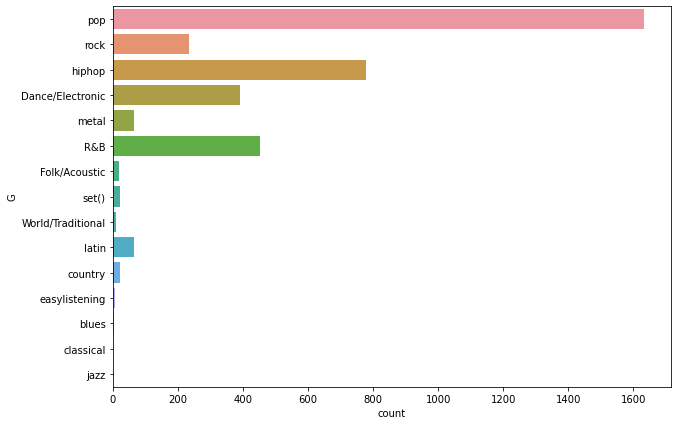

In [11]:
plt.figure(figsize = (10, 7))
sns.countplot(y = g['G'])

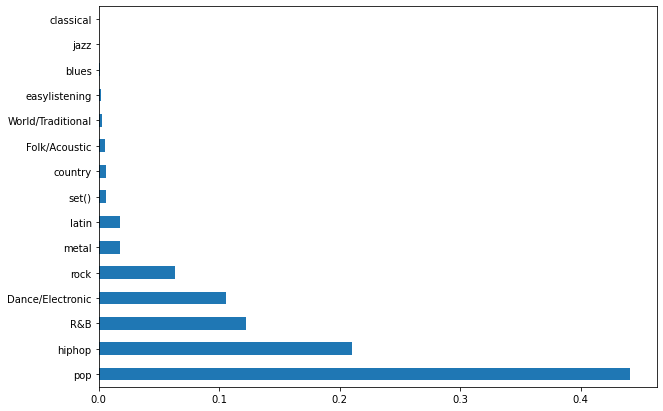

In [12]:
plt.figure(figsize = (10, 7))
g['G'].value_counts(normalize = True).plot(kind = 'barh')

In [13]:
Genre_names = g['G'].value_counts().index.tolist()
print(Genre_names)

Genre_count = g['G'].value_counts().values.tolist()
print(Genre_count)

['pop', 'hiphop', 'R&B', 'Dance/Electronic', 'rock', 'metal', 'latin', 'set()', 'country', 'Folk/Acoustic', 'World/Traditional', 'easylistening', 'blues', 'jazz', 'classical']
[1633, 778, 452, 390, 234, 66, 64, 22, 21, 20, 10, 7, 4, 2, 1]


In [14]:
len(Genre_count)

15

<Figure size 1080x1080 with 0 Axes>

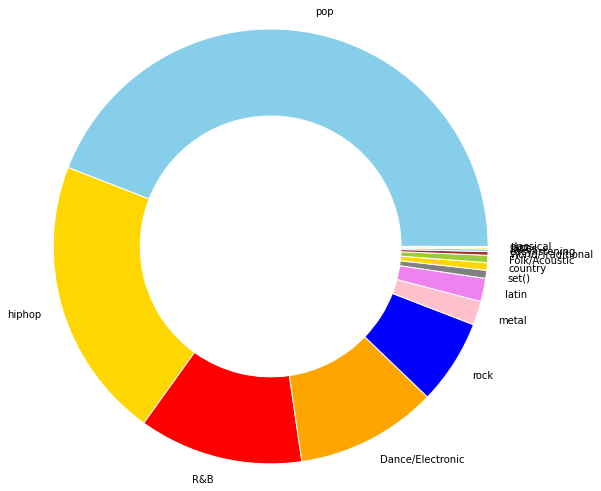

In [15]:
colo = ['skyblue', 'gold','red','orange','blue','pink','violet','grey','gold','yellowgreen','brown',
       'skyblue', 'gold','red','orange']

plt.figure(figsize=(15,15))
fig, gen = plt.subplots() # to make the figure occur in subplots otherwise it occupies the entire grid
gen.axis('equal')
Genpie, _ = plt.pie(Genre_count, radius=2.5, labels=Genre_names, colors = colo)
plt.setp(Genpie, width=1, edgecolor='white')
plt.margins(0,0)

In [16]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock,pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop,country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock,metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [17]:
d = df.groupby('year')['popularity'].mean().reset_index()

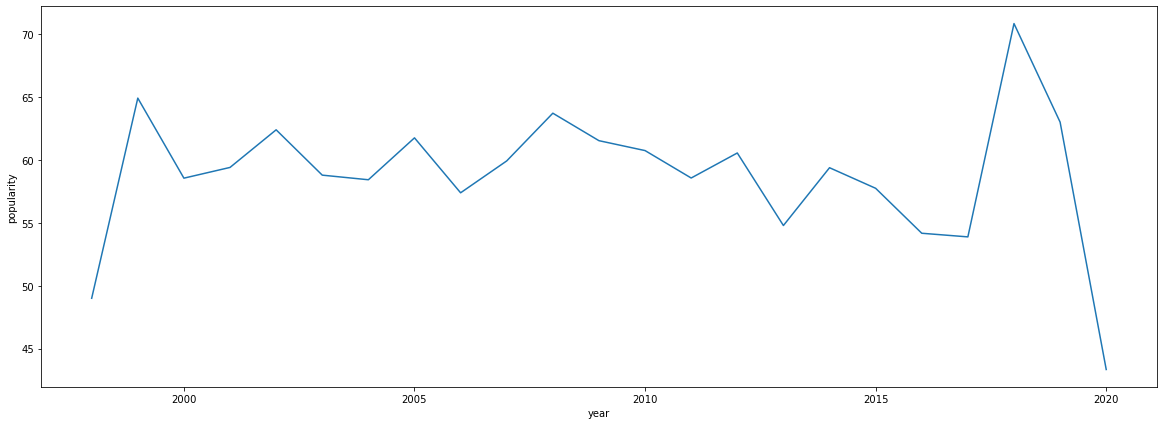

In [18]:
plt.figure(figsize=(20,7))
_ = sns.lineplot(x="year", y="popularity",data=d)

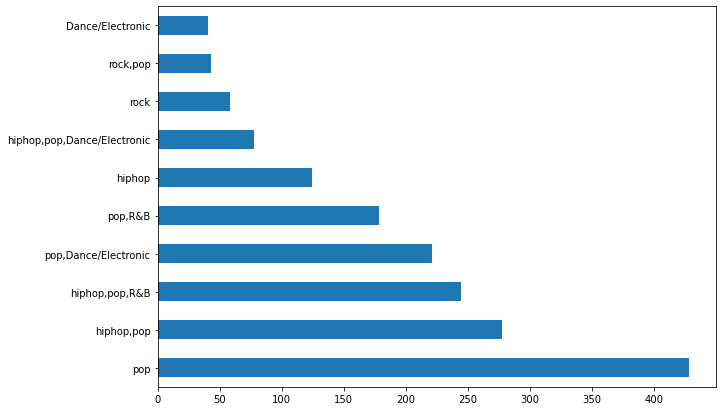

In [19]:
plt.figure(figsize=(10,7))
df['genre'].value_counts()[0:10].plot(kind = 'barh') # top 10

In [20]:
top_10 = df['genre'].value_counts()[0:10].index.tolist()
print(top_10)

['pop', 'hiphop,pop', 'hiphop,pop,R&B', 'pop,Dance/Electronic', 'pop,R&B', 'hiphop', 'hiphop,pop,Dance/Electronic', 'rock', 'rock,pop', 'Dance/Electronic']


In [21]:
df1 = df[df['genre'].isin(top_10)].reset_index(drop = True)

In [22]:
pd.crosstab(df1['year'], df1['genre'])

genre,Dance/Electronic,hiphop,"hiphop,pop","hiphop,pop,Dance/Electronic","hiphop,pop,R&B",pop,"pop,Dance/Electronic","pop,R&B",rock,"rock,pop"
year,,,,,,,,,,
1998,0,0,0,0,1,0,0,0,0,0
1999,1,3,1,0,3,11,2,5,1,2
2000,1,4,4,0,10,16,4,11,1,1
2001,5,4,7,0,19,25,6,18,0,5
2002,1,8,11,0,27,19,2,5,2,3
2003,1,1,18,0,11,15,6,17,2,4
2004,2,14,12,0,14,15,5,15,4,0
2005,1,8,21,0,18,10,3,12,6,4
2006,2,0,15,0,8,26,2,15,10,2


C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


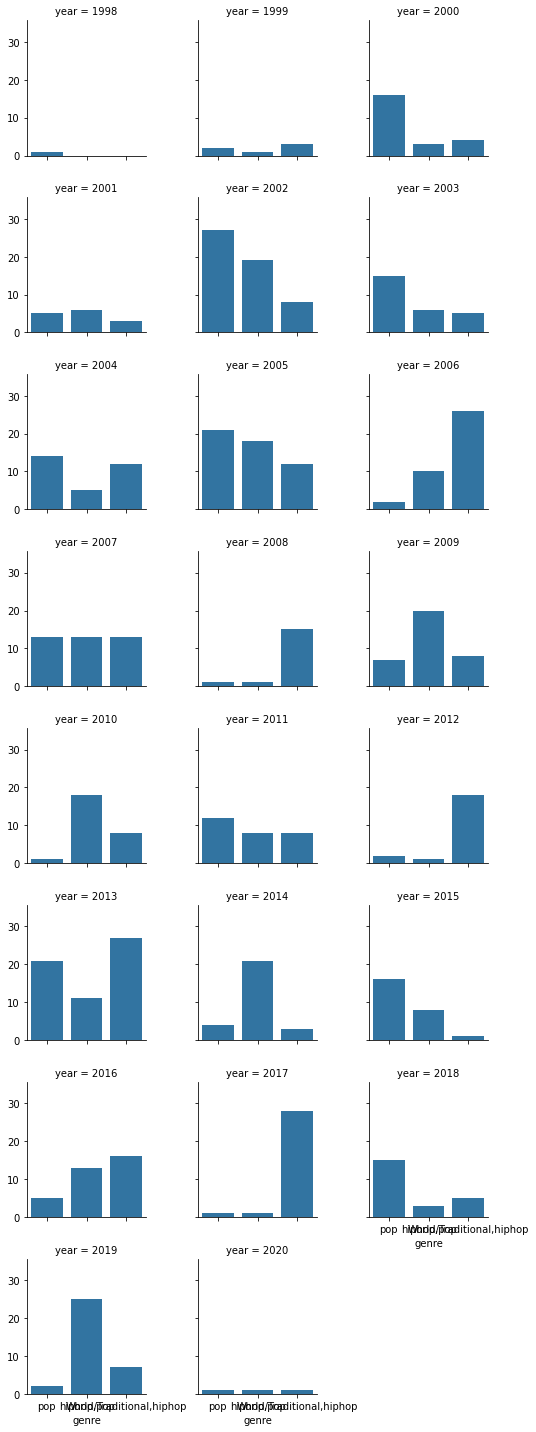

In [23]:
g = sns.FacetGrid(col = 'year', data = df, col_wrap = 3, size = 2.5)
g.map(sns.countplot, 'genre')

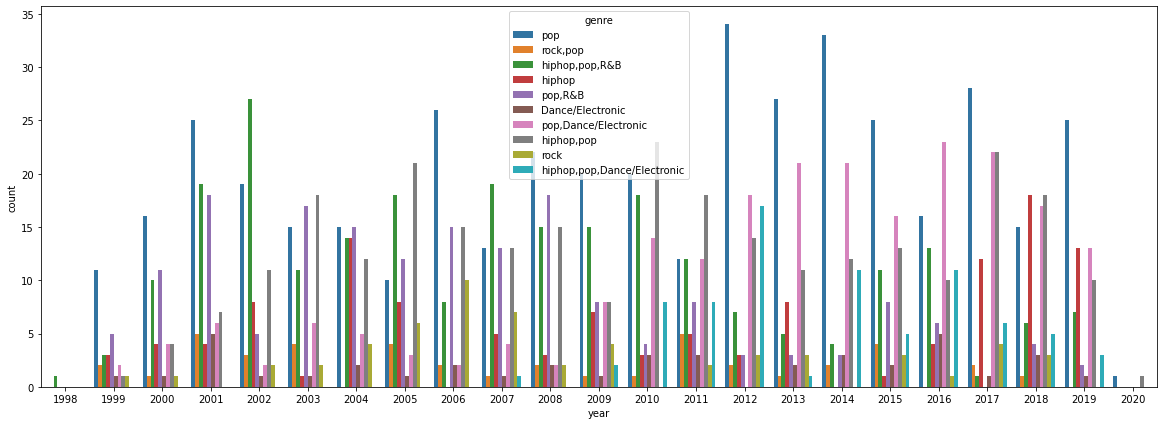

In [24]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'year', hue = 'genre', data = df1)

In [25]:
df['artist'].nunique()

835

In [26]:
d = df['artist'].value_counts()[0:10]
d

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
David Guetta      18
Kanye West        17
Chris Brown       17
Beyoncé           16
Katy Perry        16
Name: artist, dtype: int64

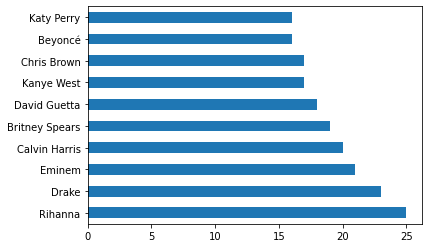

In [27]:
d.plot(kind = 'barh')

In [28]:
ars = d.index.tolist()

In [29]:
df2 = df[df['artist'].isin(ars)].reset_index(drop = True)

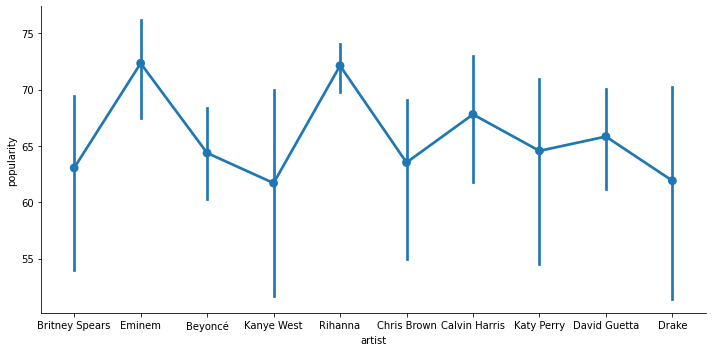

In [30]:
sns.catplot(x = 'artist',y = 'popularity', data = df2, kind = 'point',height=5, aspect=2)

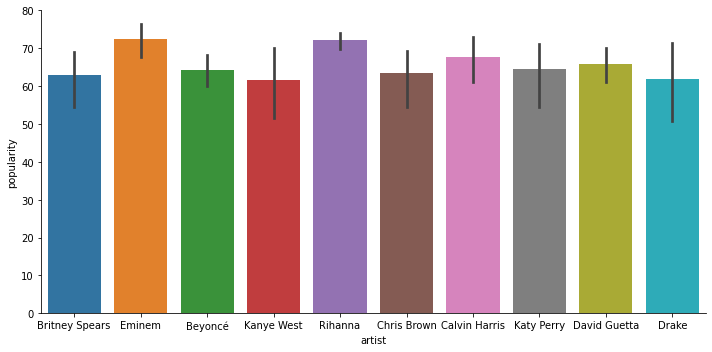

In [31]:
sns.catplot(x = 'artist',y = 'popularity', data = df2, kind = 'bar',height=5, aspect=2)

In [32]:
# pop index = pop/count

d1 = d.to_dict()
d1

{'Rihanna': 25,
 'Drake': 23,
 'Eminem': 21,
 'Calvin Harris': 20,
 'Britney Spears': 19,
 'David Guetta': 18,
 'Kanye West': 17,
 'Chris Brown': 17,
 'Beyoncé': 16,
 'Katy Perry': 16}

In [33]:
df2['num of performances'] = df2['artist'].apply(lambda k: d1[k])
df2.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,num of performances
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,19
1,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hiphop,21
2,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4.842,0,0.0454,0.1160,0.000465,0.0710,0.686,84.110,pop,19
3,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5.707,1,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop,19
4,Eminem,Stan,404106,True,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.0371,0.000002,0.5180,0.507,80.063,hiphop,21


In [34]:
df2['pop_index'] = np.round(df2['popularity']/df2['num of performances'],2)
df2.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,num of performances,pop_index
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,19,4.05
1,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hiphop,21,4.10
2,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4.842,0,0.0454,0.1160,0.000465,0.0710,0.686,84.110,pop,19,3.05
3,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5.707,1,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop,19,3.42
4,Eminem,Stan,404106,True,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.0371,0.000002,0.5180,0.507,80.063,hiphop,21,3.95


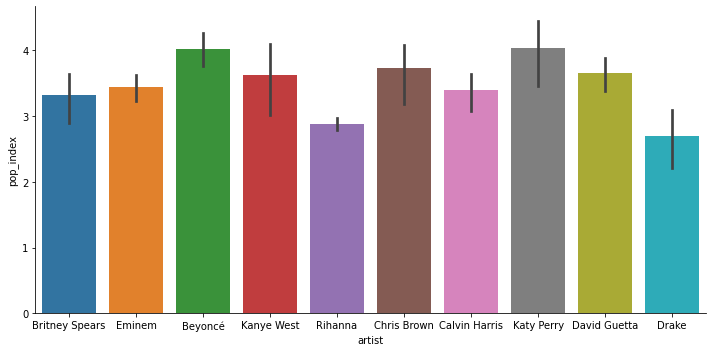

In [35]:
sns.catplot(x = 'artist',y = 'pop_index', data = df2, kind = 'bar',height=5, aspect=2)

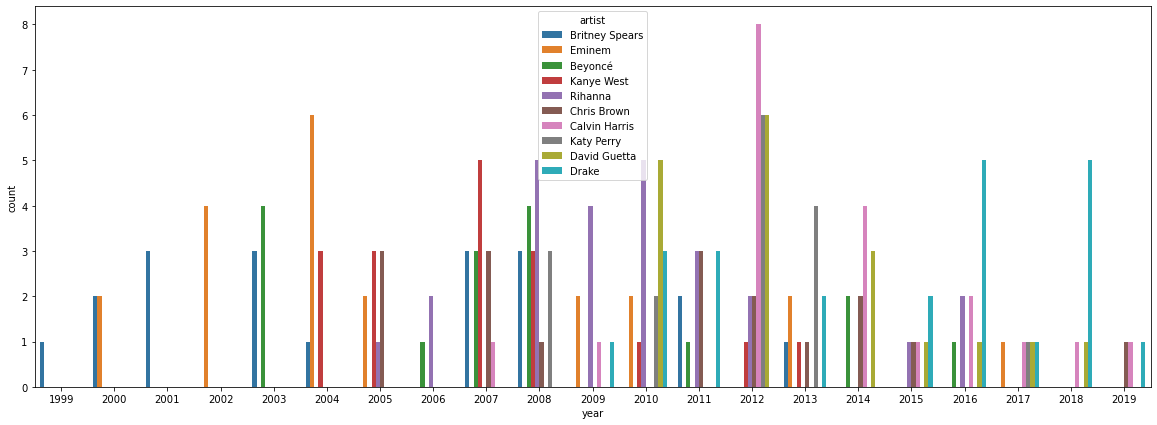

In [36]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'year', hue = 'artist', data = df2)

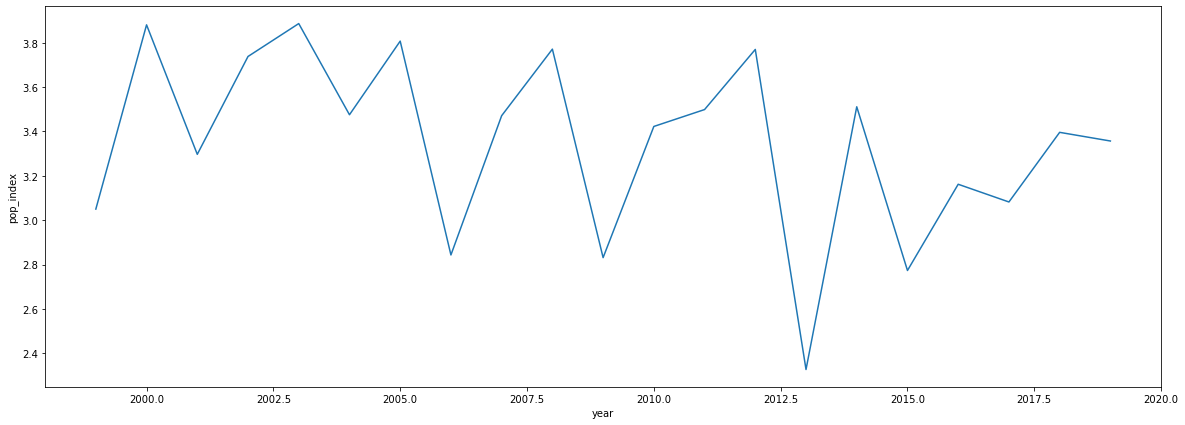

In [37]:
d3 = df2.groupby('year')['pop_index'].mean().reset_index()

plt.figure(figsize=(20,7))
sns.lineplot(x = 'year', y = 'pop_index', data = d3)

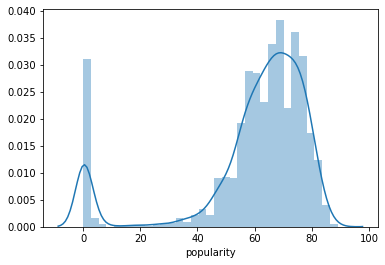

In [39]:
sns.distplot(df['popularity'])

In [50]:
float_cols = df.dtypes[df.dtypes == 'float64'].index.tolist()
float_cols

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [51]:
def find_r_c(cols):
    
    size = len(cols)
    
    if size <= 3:
        c = size
        r = 1
        
    elif size == 4:
        c = 2
        r = 2
    
    elif size > 4:
        c = 3
        if size%c == 0:
            r = int(size/c)
        else:
            r = int(size/c)+1
            
    return r,c

In [52]:
# custom function for easy and efficient analysis of numerical univariate

def desc_stat_cont(data, cols):
    '''
    This takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    '''
    
    r,c = find_r_c(cols)

    plt.rcParams['figure.figsize'] = [20, 6*r]
    plt.subplots_adjust(hspace =1)

    count = 1
    #looping for each variable
    for i in cols:

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max()-data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        coef_var = st_dev/mean*100

        # calculating mu +- 1*sigma 
        m1s = mean-st_dev, mean+st_dev
        
        # rounding off
        mean = round(mean,2)
        median = round(median,2)
        mini = round(mini,2) 
        maxi = round(maxi,2)
        ran = round(ran,2)
        st_dev = round(st_dev,2)
        m1s = [round(i) for i in m1s]
        coef_var = round(coef_var,2)
        
        q1 = round(np.percentile(data[i], 25), 2)
        q2 = round(np.percentile(data[i], 50), 2)
        q3 = round(np.percentile(data[i], 75), 2)

        #Plotting the variable with every information
        plt.subplot(r,c,count)
        
        sns.kdeplot(data[i], shade=True) # you can use distplot also
        sns.scatterplot([mean], [0], color = 'red', label = "mean", s=100)
        sns.scatterplot([median], [0], color = 'blue', label = "median/Q2", s = 50)
        sns.lineplot(m1s, [0,0], color = 'black', label = "m+-1s") # for drawing line
        sns.scatterplot([q1,q3], [0,0], color = 'green', label = "Q1,Q3", s = 40)
        sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max", s = 100) # for plotting dot

        plt.xlabel('{}'.format(i), fontsize = 15)
        plt.ylabel('density',fontsize = 15)
        
        titl = 'mean = {}; median = {}; std_dev = {}; \nmu+-sigma = {}; coef_var = {}%,\nmin = {}; max = {}; range = {};\nQ1,Q2,Q3 = {}'
        plt.title(titl.format(mean, median,st_dev,(m1s[0],m1s[1]), coef_var,  mini,  maxi,  ran, (q1,q2,q3)), fontsize = 14)
                  
        plt.legend(loc='upper right', fontsize = 13)
        
        count += 1

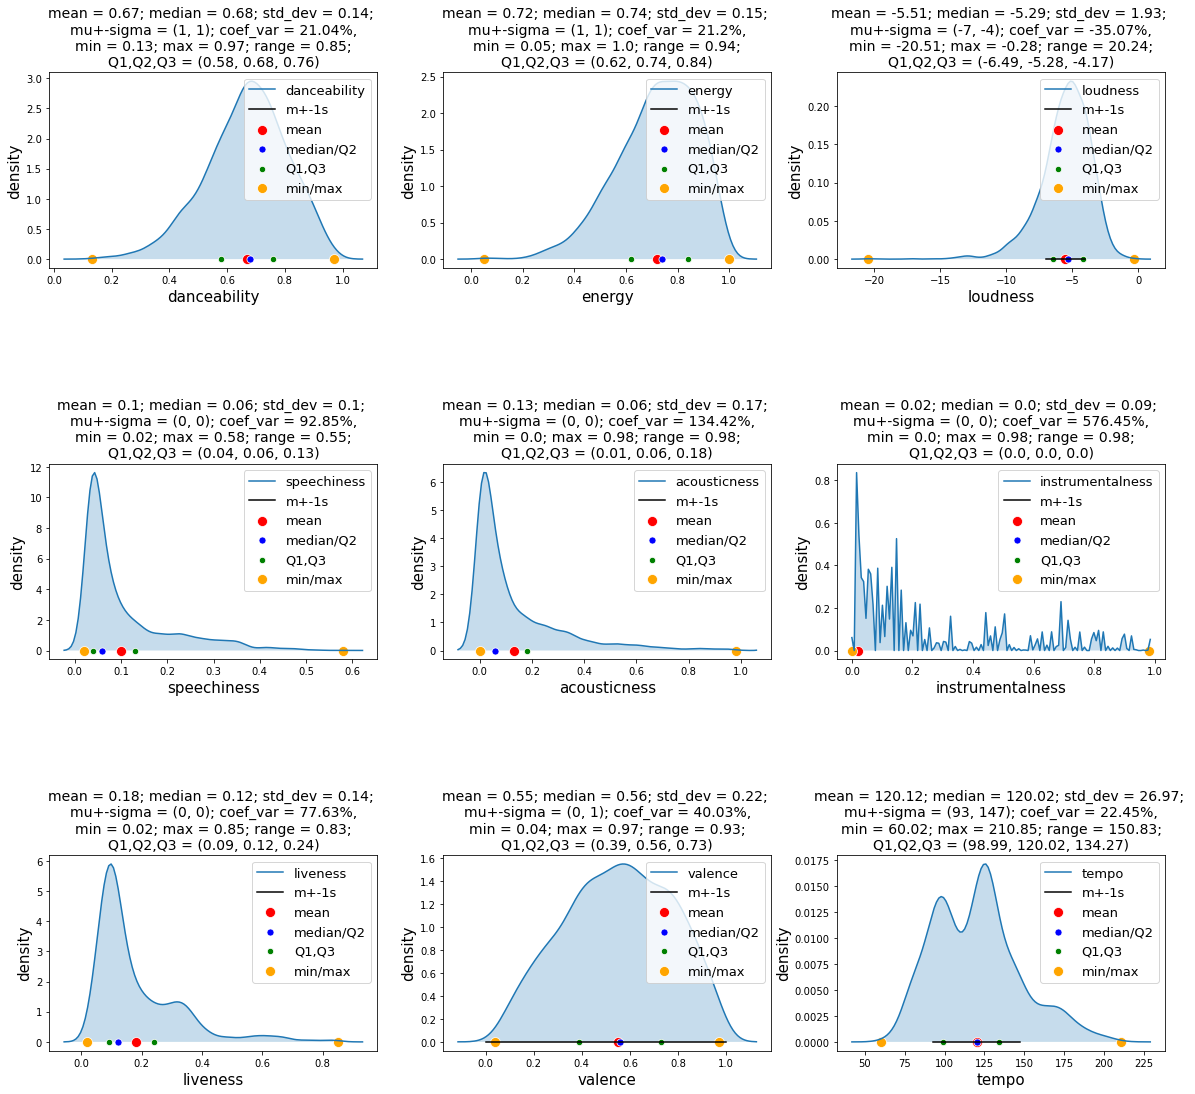

In [53]:
desc_stat_cont(df, float_cols)

In [54]:
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock,pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop,country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000014,0.3470,0.544,119.992,"rock,metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [92]:
def plot_scatter_cont_cols(df, cols, y):
    
    r,c = find_r_c(cols)
    
    plt.rcParams["figure.figsize"] = [20, 6*r]
    plt.subplots_adjust(hspace =0.4)

    count = 1
    for i in cols:
        
        plt.subplot(r,c,count)
        x = i
        plt.scatter(x=x,y=y, data = df)
        corr = round(df[[x,y]].corr().iloc[0,1],3)
        plt.title('corr = {}'.format(corr), fontsize = 15)
        plt.xlabel(x, fontsize = 14, fontweight='bold')
        plt.ylabel(y, fontsize = 14)

        count+=1

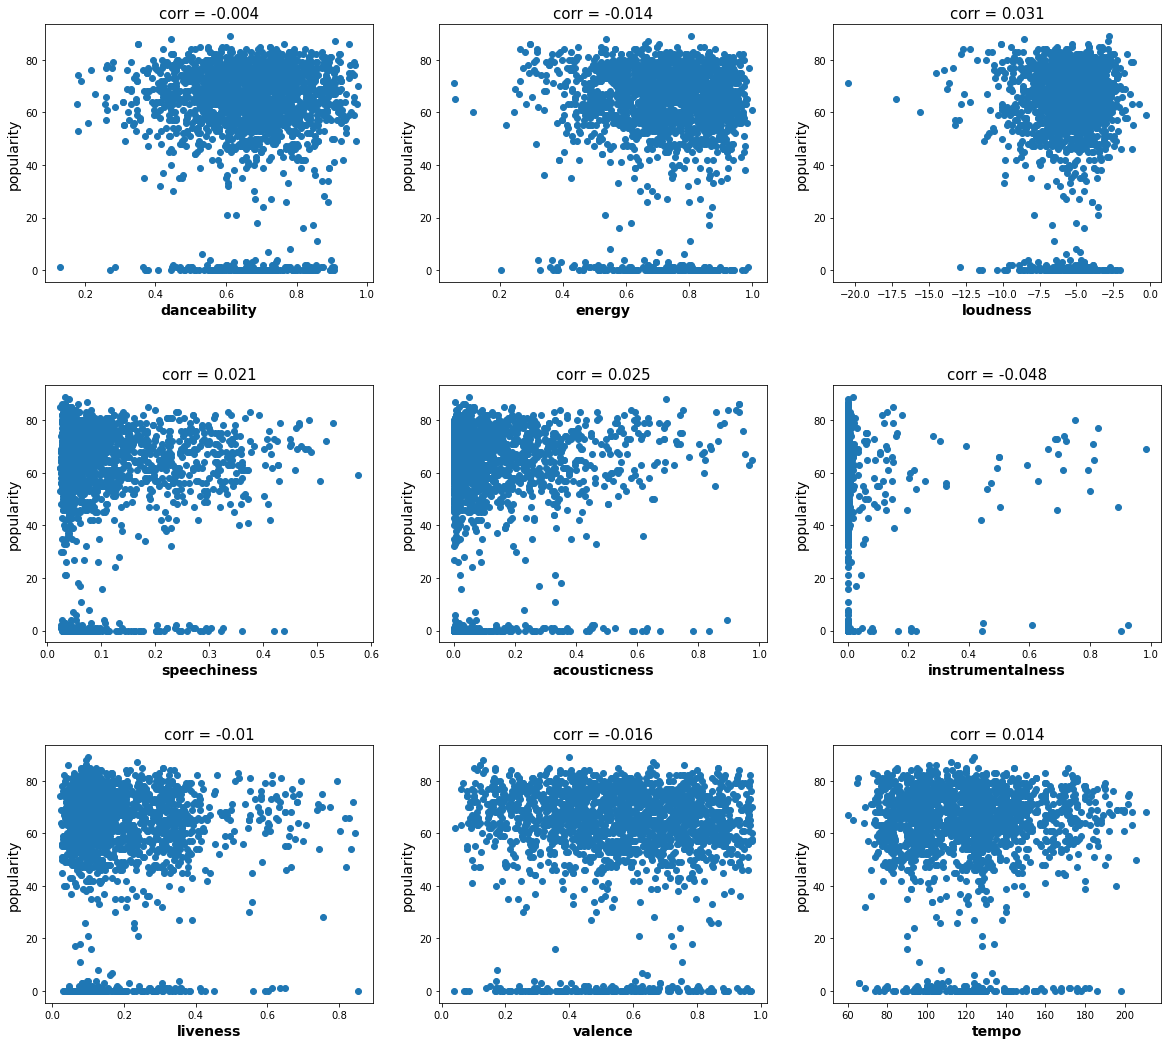

In [93]:
plot_scatter_cont_cols(df, float_cols, 'popularity')

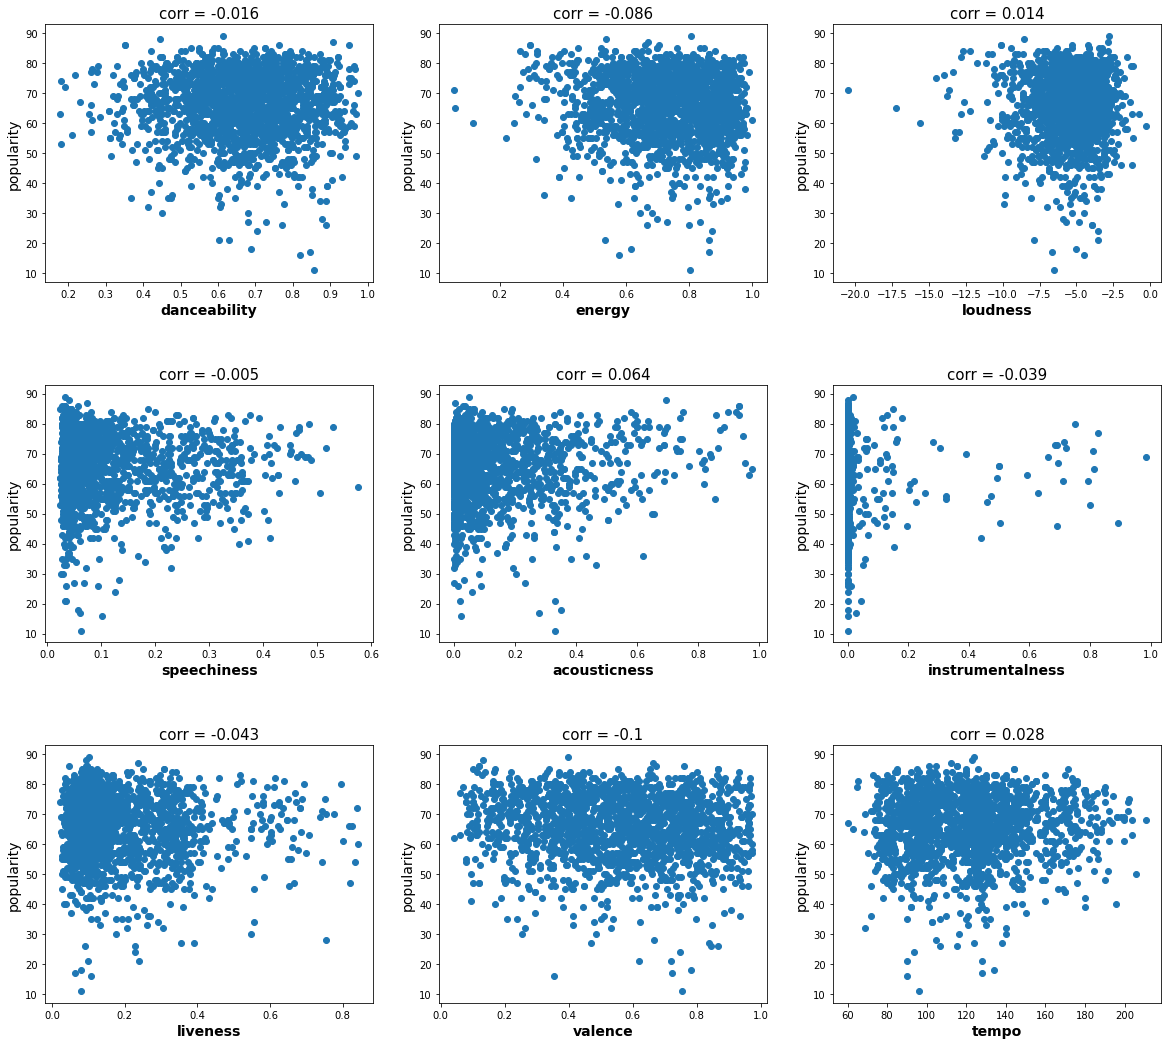

In [94]:
df_ = df[df['popularity'] >10].reset_index(drop = True)
plot_scatter_cont_cols(df_, float_cols, 'popularity')